## 9.2 Bayes Theorem (recap)

Let's remind ourselves of Bayes theorem for discrete events, which we met in Session 2 (probability): 

If $A$ and $B$ are events, then 

$$
P(A|B) = \frac{ P(B|A) P(A) } {P(B)} \propto P(B|A) P(A),
$$


or in words: 

$$
\mbox{posterior probability of A given B} \propto \mbox{the likelihood of B given A} \times \mbox{the prior probability of A}.
$$

Also, if $A_i$ is a set of mutually exclusive and exhaustive events, i.e. $ p( \bigcup\limits_i A_i ) = \sum\limits_i p(A_i) = 1$ and $A_i \cap A_j = \emptyset$ for $i \neq j$, then 

$$
p(A_i|B) = \frac{ p(B|A_i) p(A_i) } {\sum\limits_j p(B|A_j) p(A_j) }.
$$

The calculation of the denominator is more difficult if we have continuous parameters as it requires integration over A; we will discuss this in the next section.   

We will illustrate Bayes Theorem further with the diagnostic test example for Covid-19 below. We see Bayesian reasoning is purely probabilistic. Bayes theorem gives us a principled way to update prior probabilities on the basis of new data. 



### 9.2.1 Example 

[Watson (2020)](https://www.bmj.com/content/bmj/369/bmj.m1808.full.pdf) discusses some interesting issues around the interpretation of Covid-19 diagnostic tests. Typically, a clinician estimates a pre-test probability (a prior probability) of having Covid-19 for a particular area, which is derived from knowledge about local rates of Covid-19. Then, given a patient's test result, the post-test probability (the posterior probability) of having Covid-19 is obtained. The posterior probability depends on the pre-test probability, as well as the sensitivity and specificity of the test, which are difficult to estimate; often, sensitivity is over-estimated. The article discusses how one can be fairly confident about a positive test result, but more caution is needed for a negative test result, as there may still be quite a high chance that a person has Covid-19. We illustrate this with Bayes' theorem. 

Suppose that, in a student hall of residence, the prevalence of Covid-19 if you have a persistent cough is $75\%$. Suppose we assume that the test will be positive in Covid-19 patients $70\%$ of the time (sensitivity is 0.7), and it will be negative in non-Covid-19 patients $95\%$ of the time (specificity is 0.95). Given that a student in this hall with a persistent cough tests negative, what is the probability that they have Covid-19? In other words, what is the probability of a false negative?  

Let us denote by $C+$ the event that a person has Covid-19, and $C-$ the event that a person does not have Covid-19.  Further we denote by $T+$ and $T-$ the events that a person has a positive and a negative test, respectively. The information we are given is that: 


$$
p(C+)=0.75, \qquad p(T+|C+)=0.70, \qquad p(T-|C-)=0.95
$$

Now, what we want is:

$$
\begin{align}
p(\mbox{false negative}) &= p(C+|T-) = \frac{p(T-|C+)p(C+)}{p(T-)} \\
&= \frac{p(T-|C+)p(C+)}{p(T-|C+)p(C+) + p(T-|C-)p(C-)} \\
&= \frac{(1-0.7) \times 0.75}{(1-0.7) \times 0.75 + 0.95 \times 0.25} \\
&= \frac{0.225}{0.4625} \\
&= 0.4864
\end{align}
$$

You can see that, despite the negative test result, due to the very high prevalence of Covid-19 in the hall of residence and the relatively low sensitivity rate, there is still a 48.64% chance that a person has Covid-19.  

Suppose a different student has no symptoms. The prevalence of Covid-19 in asymptomatic people is 0.1. They use the same diagnostic test and the test result is positive. What is the probability that this student with a positive test result has Covid-19? In other words, what is $p(C+|T+)$?

Solution:

$$
\begin{align}
p(C+|T+) &= \frac{p(T+|C+)p(C+)}{p(T+)} \\ & = \frac{p(T+|C+)p(C+)}{p(T+|C+)p(H+) + p(T+|C-)p(C-)}  \\
&= \frac{0.7 \times 0.1}{0.7 \times 0.1 + (1-0.95) \times 0.9} \\
&= \frac{0.07}{0.115} \\
&= 0.609
\end{align}
$$

This means that, amongst all the people who test positive, $60.9\%$ will actually have the disease. After a positive result from a test, the probability that you have Covid-19 increase from $10\%$ to $61\%$.

Note that these results are specific to the the prevalence of Covid-19 in the area, as well as the sensitivity and specificity of the diagnostic test. The code below reproduces the leaf-plot from [Watson (2020)](https://www.bmj.com/content/bmj/369/bmj.m1808.full.pdf). The $x$-axis is the pre-test probability of having Covid-19. The corresponding $y$-values on the lower curve (lower leaf) are the post-test probabilities of having Covid-19, following a negative test result. The corresponding $y$-values on the upper curve (upper leaf) are the post-test probabilities of having Covid-19, following a positive test result. The correponding values on the diagonal ($y=x$) line represent probabilities if no test is carried out. 

In our first example, the prevalence in symptomatic people is 0.75, so we follow the orange arrows to find that the post-test probability after a negative result 0.4864. In the second example, the prevalence in asymptomatic people is 0.1. We follow the purple arrows to find that the post-test probability after a positive result is 0.609. How do you think the shape of the lower and upper leaves would change, if sensitivity was higher? If specificity was lower? Re-run the code with different values to check. 

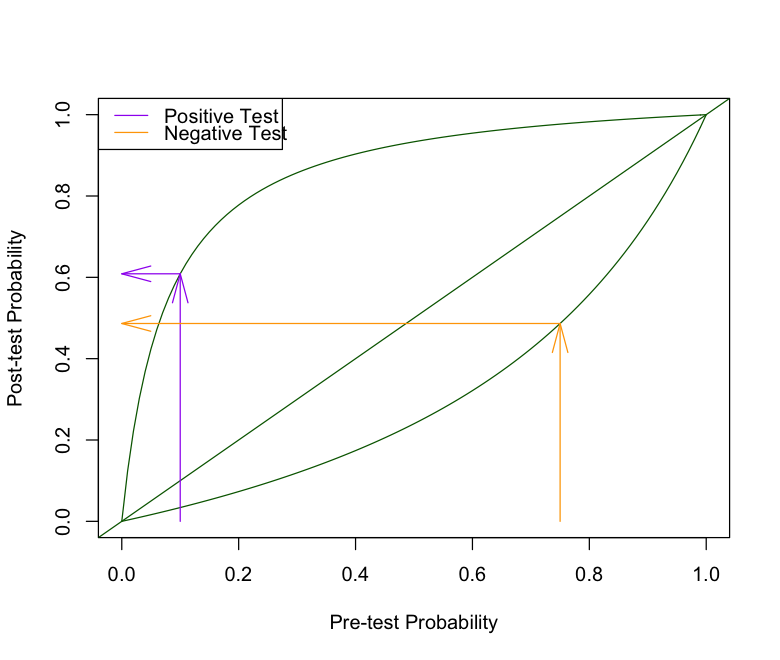

In [1]:
# Function takes as arguments the sensitivitiy of the test (sensi) 
# and the specificity (speci)

leafplot <- function(sensi, speci){
  
  pretest <- seq(0, 1, 0.01) #possible pre-test probabilities 
  
  #probability of having Covid-19 after a positive test result 
  pos.test <- sensi*pretest/(sensi*pretest+(1-speci)*(1-pretest))
  
  #probability of having Covid-19 after a negative test result 
  neg.test <- ((1-sensi)*(pretest))/((1-sensi)*pretest+speci*(1-pretest))
  
  #plot leaves
  plot(pretest, pos.test, type="l", col="darkgreen", 
     xlab="Pre-test Probability", ylab="Post-test Probability")
  points(pretest, neg.test, type="l", col="darkgreen")
  abline(a=0, b=1, col="darkgreen")
  legend("topleft", legend=c("Positive Test", "Negative Test"),
        col=c("Purple", "Orange"), lty=1, bg="transparent")
  
  #plot arrows 
    #we use pretest[11] to get the prevalence value of 0.1, and 
    #pretest[76] to get the prevalence value of 0.75 in the vector "pretest"
    
  arrows(pretest[11], 0, pretest[11], pos.test[11], angle=15, col="purple")
  arrows(pretest[11], pos.test[11], 0, pos.test[11], angle=15, col="purple")
  arrows(pretest[76], 0, pretest[76], neg.test[76], angle=15, col="orange")
  arrows(pretest[76], neg.test[76], 0, neg.test[76], angle=15, col="orange")
  
  }

options(repr.plot.width=6.5, repr.plot.height=5.5)
leafplot(sensi=0.7, speci=0.95)


#See what happens to the plot when you change sensitivity and specificity! 
#leafplot(0.95, 0.8)